In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

In [7]:
def _sort(seq):
    seen = set()
    seen_add = seen.add
    return [x for x in seq if not (x in seen or seen_add(x))]

In [8]:
params = {'legend.fontsize': 14,
          'figure.figsize': (20,8),
          'axes.labelsize': 16,
          'axes.titlesize': 16,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          #'title.set_fontsize': 18,
          #'xaxis.label.set_size': 12,
          #'yaxis.label.set_size': 12
          #'axes.titlepad': 25
         }
plt.rcParams.update(params)

In [9]:
df = pd.read_csv("metadata_all_virus_Brazil.csv", sep="\t", index_col=False)
#df = pd.read_csv("metadata_h1n1_Brazil_common.csv", sep="\t", index_col=False)

In [10]:
df = df[['virus', 'collection_date', 'label_date', 'country']]

In [11]:
df.reset_index(drop=True, inplace=True)

In [12]:
df['collection_date'] = pd.to_datetime(df['collection_date'])
#df['label_date'] = pd.to_datetime(df['label_date'])

In [13]:
COUNTRY = list(set(df['country'].values))
COUNTRY.sort()

/tmp/ipykernel_411002/1510194014.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  clade_color_dict = {clade: plt.cm.get_cmap('Paired').colors[i] for i, clade in enumerate(unique_clades)}


[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6509803921568628, 0.807843137254902, 0.8901960784313725), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)]
21


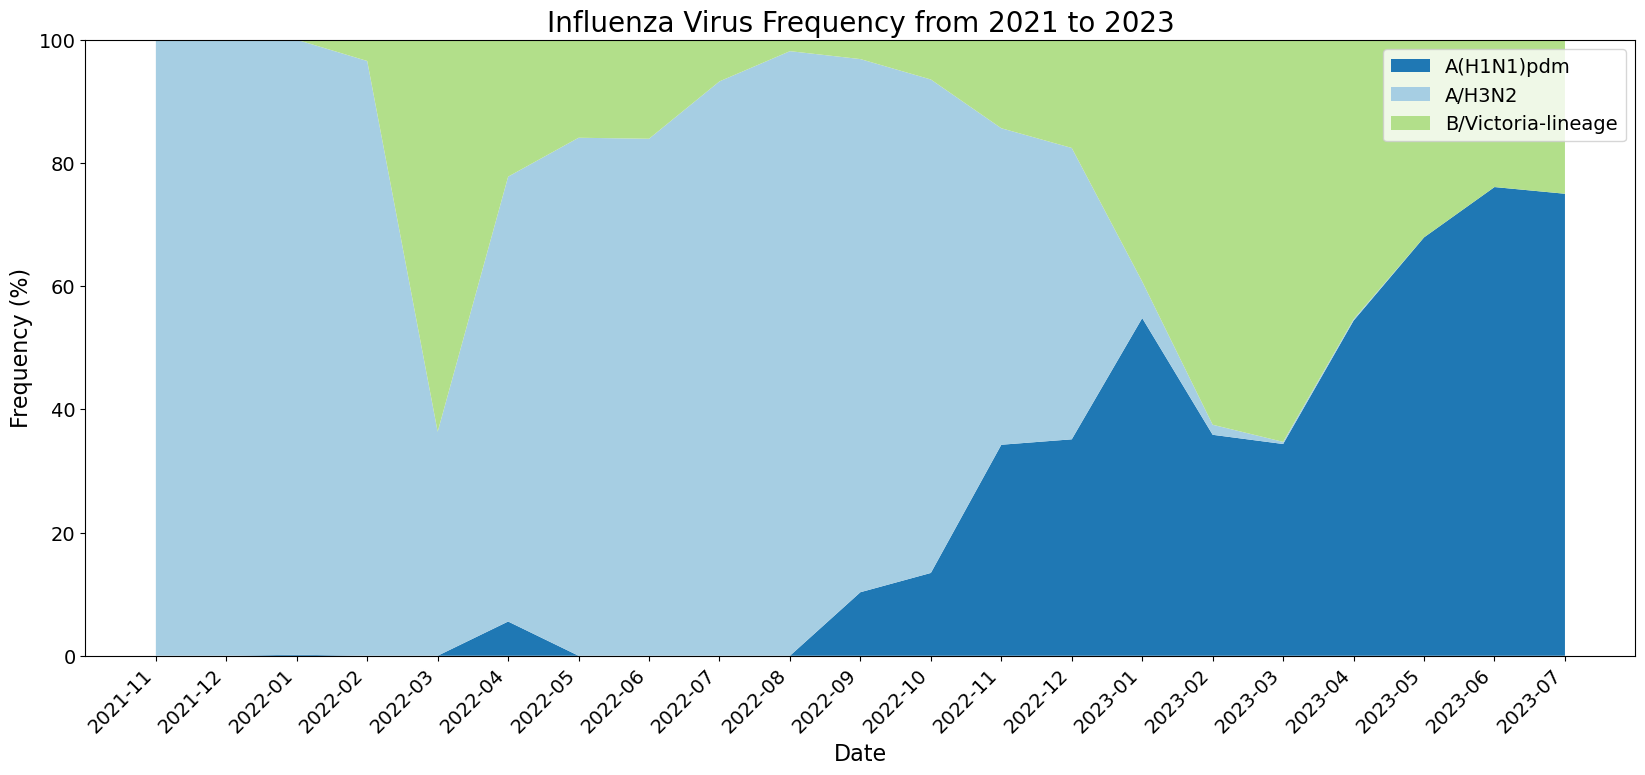

In [14]:
# Create a dictionary mapping each clade to a unique color
#clade_color_dict = {'5a.2a': 'red', '5a.2a.1': 'blue', '6B.1A.5a.2a': 'green', '6B.1A.5a.2a.1': 'yellow', 'V1A.3a.2': 'orange'}
unique_clades = set(df['virus'])

# Generate a dictionary of colors for each clade
clade_color_dict = {clade: plt.cm.get_cmap('Paired').colors[i] for i, clade in enumerate(unique_clades)}
#clade_color_dict = {"6B.1A.5a.1": "#8dd3c7", "6B.1A.5a.2a": "#e78ac3", "6B.1A.5a.2": "#bebada", "6B.1A.5a.2a.1": "#80b1d3"}
#clade_color_dict = {"3C.2a1b.2a.1": "#E31A1C", "3C.2a1b.2a.1a.1": "#E6AB02", "3C.2a1b.2a.2": "#bebada", "3C.2a1b.2a.2c": "#e78ac3", "3C.2a1b.2a.2b": "#FF7F00", "3C.2a1b.2a.2a": "#33A02C", "3C.2a1b.2a.2a.2": "#6A3D9A", "3C.2a1b.2a.2a.1": "#8dd3c7", "3C.2a1b.2a.2a.1a": "#FB9A99", "3C.2a1b.2a.2a.1b": "#B2DF8A", "3C.2a1b.2a.2a.3": "#80b1d3", "3C.2a1b.2a.2a.3b": "#B15928", "3C.2a1b.2a.2a.3a": "#1F78B4", "3C.2a1b.2a.2a.3a.1": "#E7298A"}
# Add more clades and colors as needed

# Create a ListedColormap using the colors from the dictionary
#clade_colors = ListedColormap([clade_color_dict[clade] for clade in set(df['clade'])])

max_freq_value = 0
num_plots = len(COUNTRY)
num_rows = (num_plots + 1) // 2

plt.title('Influenza Virus Frequency from 2021 to 2023', fontsize=20)

all_labels = []
handles=[]
labels=[]
handle_dict={}

df2 = df.loc[np.where(df['country'] == COUNTRY[0])]
df2 = df2[['collection_date', 'virus']]
df2['month'] = df2['collection_date'].dt.to_period('M')

freq_por_mes = df2.groupby(['month', 'virus']).size().unstack(fill_value=0)
#freq_por_mes = freq_por_mes / freq_por_mes.sum(axis=0)*100
freq_por_mes = freq_por_mes.T/freq_por_mes.sum(axis=1)*100
freq_por_mes = freq_por_mes.T
#print(freq_por_mes)

max_freq_value = max(max_freq_value, freq_por_mes.values.max())

days = [str(month) for month in freq_por_mes.index]

# Use the list of colors to assign unique colors to each clade
clade_colors=[clade_color_dict[c] for c in freq_por_mes.columns]
print(clade_colors)
lines = plt.stackplot(days, freq_por_mes.T.values, labels=freq_por_mes.columns, colors =clade_colors)
plt.xlabel('Date')
plt.xticks(rotation=45, ha='right')
#axs[i, j].set_xlim(0, freq_por_mes.T.columns[-1])
print(freq_por_mes.shape[0])
plt.ylabel('Frequency (%)')
plt.legend()

# Set the same y-axis range for all subplots
plt.ylim(0, max_freq_value)

# Add a general legend
#plt.legend(all_labels, labels=list(set(df.clade)), bbox_to_anchor=(0.5, -0.05), ncol=len(set(df.clade)))

#fig.legend(list(handle_dict.values()), labels=list(handle_dict.keys()), loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(set(df.lineage)), fontsize = '14')

#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
#plt.legend(markers, D_id_color.keys(), numpoints=1)

#fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.35)

plt.show()


[(0.12156862745098039, 0.47058823529411764, 0.7058823529411765), (0.6980392156862745, 0.8745098039215686, 0.5411764705882353), (0.6509803921568628, 0.807843137254902, 0.8901960784313725)]
21


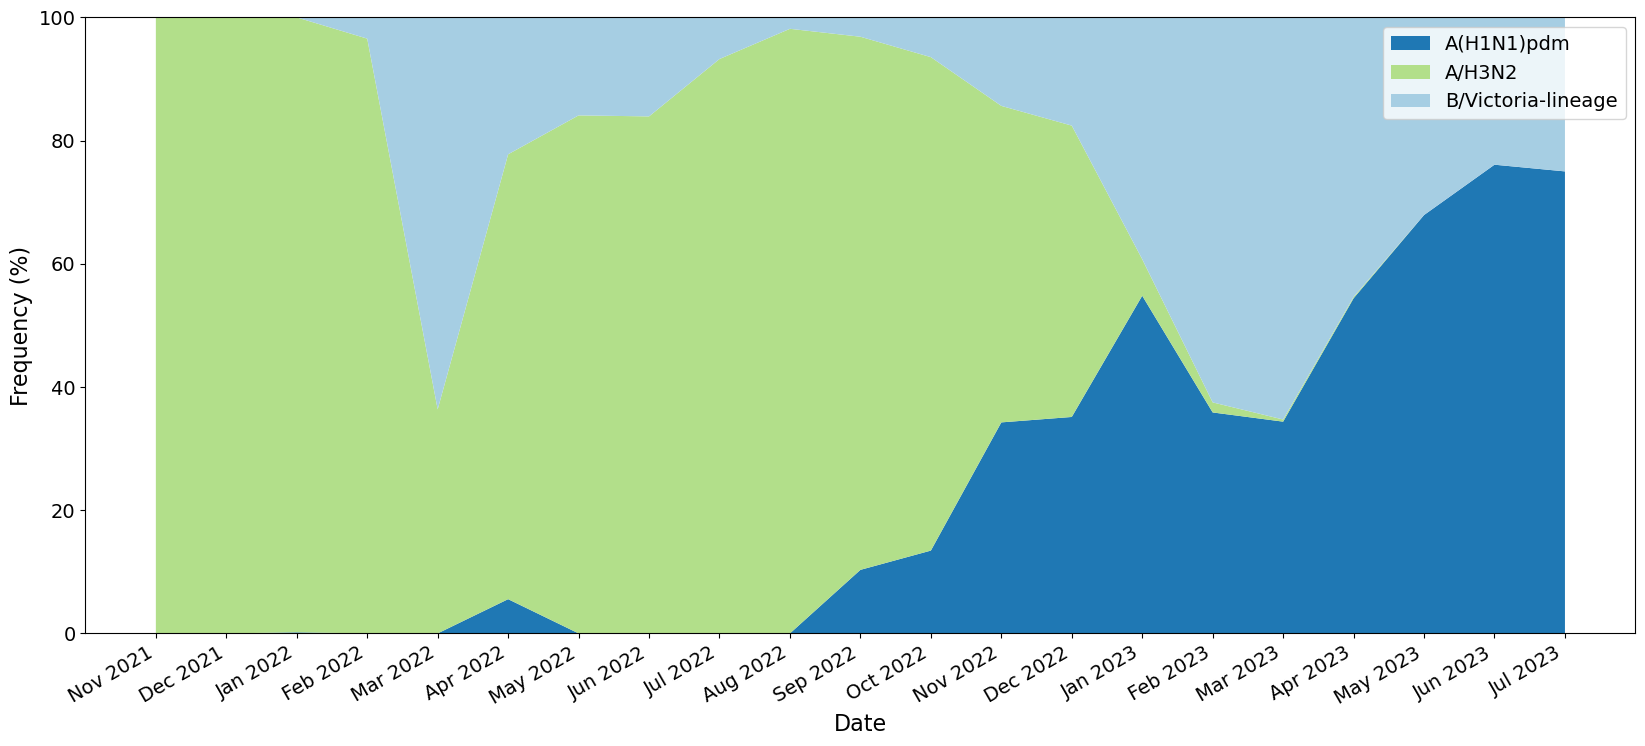

In [17]:
# Create a dictionary mapping each clade to a unique color
#clade_color_dict = {'5a.2a': 'red', '5a.2a.1': 'blue', '6B.1A.5a.2a': 'green', '6B.1A.5a.2a.1': 'yellow', 'V1A.3a.2': 'orange'}
unique_clades = set(df['virus'])

# Generate a dictionary of colors for each clade
#clade_color_dict = {clade: plt.cm.get_cmap('Paired').colors[i] for i, clade in enumerate(unique_clades)}
clade_color_dict = {'B/Victoria-lineage': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'A(H1N1)pdm': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'A/H3N2': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)}

#clade_color_dict = {"6B.1A.5a.1": "#8dd3c7", "6B.1A.5a.2a": "#e78ac3", "6B.1A.5a.2": "#bebada", "6B.1A.5a.2a.1": "#80b1d3"}
#clade_color_dict = {"3C.2a1b.2a.1": "#E31A1C", "3C.2a1b.2a.1a.1": "#E6AB02", "3C.2a1b.2a.2": "#bebada", "3C.2a1b.2a.2c": "#e78ac3", "3C.2a1b.2a.2b": "#FF7F00", "3C.2a1b.2a.2a": "#33A02C", "3C.2a1b.2a.2a.2": "#6A3D9A", "3C.2a1b.2a.2a.1": "#8dd3c7", "3C.2a1b.2a.2a.1a": "#FB9A99", "3C.2a1b.2a.2a.1b": "#B2DF8A", "3C.2a1b.2a.2a.3": "#80b1d3", "3C.2a1b.2a.2a.3b": "#B15928", "3C.2a1b.2a.2a.3a": "#1F78B4", "3C.2a1b.2a.2a.3a.1": "#E7298A"}
# Add more clades and colors as needed

# Create a ListedColormap using the colors from the dictionary
#clade_colors = ListedColormap([clade_color_dict[clade] for clade in set(df['clade'])])

max_freq_value = 0
num_plots = len(COUNTRY)
num_rows = (num_plots + 1) // 2

#plt.title('Influenza Virus Frequency from 2021 to 2023', fontsize=20)

all_labels = []
handles=[]
labels=[]
handle_dict={}

df2 = df.loc[np.where(df['country'] == COUNTRY[0])]
df2 = df2[['collection_date', 'virus']]
df2['month'] = df2['collection_date'].dt.to_period('M')

freq_por_mes = df2.groupby(['month', 'virus']).size().unstack(fill_value=0)
#freq_por_mes = freq_por_mes / freq_por_mes.sum(axis=0)*100
freq_por_mes = freq_por_mes.T/freq_por_mes.sum(axis=1)*100
freq_por_mes = freq_por_mes.T
#print(freq_por_mes)

max_freq_value = max(max_freq_value, freq_por_mes.values.max())

days = [str(month) for month in freq_por_mes.index]

# Use the list of colors to assign unique colors to each clade
clade_colors=[clade_color_dict[c] for c in freq_por_mes.columns]
print(clade_colors)
lines = plt.stackplot(days, freq_por_mes.T.values, labels=freq_por_mes.columns, colors =clade_colors)
plt.xlabel('Date')
plt.xticks(rotation=30, ha='right')
#axs[i, j].set_xlim(0, freq_por_mes.T.columns[-1])
print(freq_por_mes.shape[0])
plt.ylabel('Frequency (%)')
plt.legend()

# Set the same y-axis range for all subplots
plt.ylim(0, max_freq_value)
df = df.sort_values(by=['collection_date'], ascending=True)
label_date = _sort(list(df.label_date))
#plt.xticks(a)
plt.xticks(np.arange(0, len(label_date), 1), label_date)

# Add a general legend
#plt.legend(all_labels, labels=list(set(df.clade)), bbox_to_anchor=(0.5, -0.05), ncol=len(set(df.clade)))

#fig.legend(list(handle_dict.values()), labels=list(handle_dict.keys()), loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(set(df.lineage)), fontsize = '14')

#markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
#plt.legend(markers, D_id_color.keys(), numpoints=1)

#fig.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.8, wspace=0.35)
plt.savefig("metadata_all_virus_Brazil.pdf", dpi=300, bbox_inches='tight')
plt.show()



In [11]:
clade_color_dict

{'B/Victoria-lineage': (0.6509803921568628,
  0.807843137254902,
  0.8901960784313725),
 'A(H1N1)pdm': (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 'A/H3N2': (0.6980392156862745, 0.8745098039215686, 0.5411764705882353)}